Make a difference plot for the mean of all test images on inference time between pretrained fully conv autoencoder (FCAE) and conv autoencoder with denses (CAE+D)

In [14]:
import keras
(_, _), (x_test, _) = keras.datasets.mnist.load_data()

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype('float32') / 255.
# x_test = x_test[:1000]

In [15]:
fcae = keras.models.load_model('../models/51_1split.h5')
caed = keras.models.load_model('../models/51_1split_dense.h5')

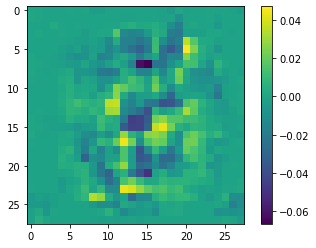

In [20]:
import numpy as np
import tensorflow as tf

### GPU malloc for test tensor doesn't allow parallel computation
# y_fcae = fcae(x_test)
# y_caed = caed(x_test)

# y_bar_fcae = tf.reduce_mean(y_fcae, axis=0)
# y_bar_caed = tf.reduce_mean(y_caed, axis=0)

# diff =  abs(y_bar_fcae - y_bar_caed)

### .. So we do it by hand.
diff = np.zeros((1,28,28,1))
for x in x_test:
    y1 = fcae(x.reshape(1,28,28,1))
    y2 = caed(x.reshape(1,28,28,1))
    diff += y1 - y2
diff /= x_test.shape[0]

import matplotlib.pyplot as plt

plt.imshow(tf.reshape(diff, (28,28)))
plt.colorbar()
plt.savefig('../img/52_PLOTS/FCAE_CAED_diff.png',  bbox_inches='tight', transparent=True, pad_inches=0)